# Tensorflow Demo in Sagemaker Studio Lab

[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/adrianusk/sagemaker-studiolab-demo/blob/master/tensorflow%20mnist.ipynb)

This notebook works with tf-plt kernel.  
First Lets import tensorflow and mnist dataset

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

2022-07-04 09:51:35.667990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 09:51:35.668024: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load training and test data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Import plotting library to show the image

In [3]:
import matplotlib.pyplot as plt

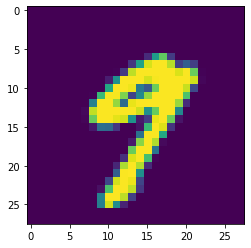

In [13]:
plt.imshow(x_test[20])

Define keras model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2022-07-04 09:51:42.314035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-04 09:51:42.314073: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-04 09:51:42.314096: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-07-04 09:51:42.315741: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compile then train and evaluate the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1406 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1052 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9761


[0.0773724764585495, 0.9761000275611877]

In [8]:
import numpy as np

In [14]:
np.argmax(model.predict(np.reshape(x_test[20],(1,28,28))))

9

In [10]:
!nvidia-smi

/usr/bin/sh: 1: nvidia-smi: not found


In [11]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
stepping	: 7
microcode	: 0x500320a
cpu MHz		: 2499.998
cache size	: 36608 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves ida arat pku ospke
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multih

In [15]:
!pwd

/home/studio-lab-user/sagemaker-studiolab-demo
